In [53]:
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import events
import visualise
import dataset

DIR = 'dataset/transformed_timestamps/interval_15m'
files = sorted(os.listdir(DIR))
files_e = enumerate(files)

# Visualize Folder

(1/65)	Showing file: 2019_49__9-6=10-1__f.csv
Swarming 0: []
Queencell 0: []
Feeding 1: [Timestamp('2019-09-10 19:00:00')]
Honey 0: []
Treatment 0: []
Died 0: []
2019-09-06 00:00:00  ---  2019-10-01 00:00:00


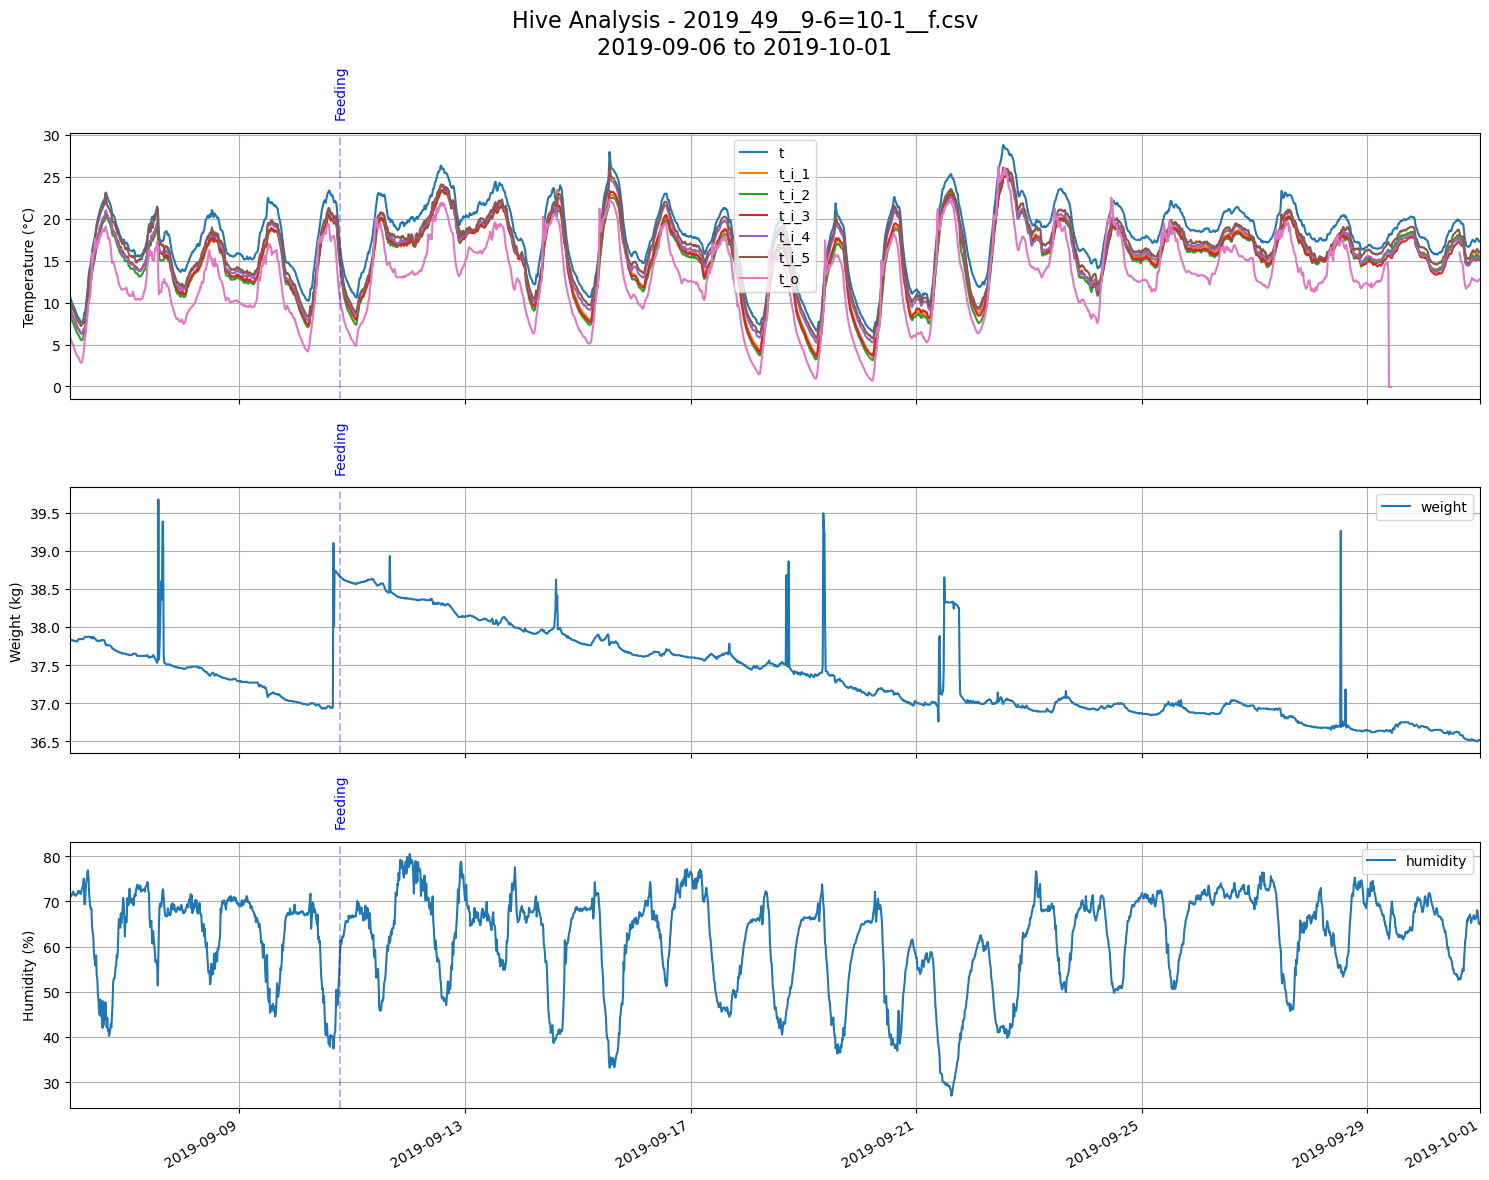

In [55]:
i, file = files_e.__next__()
print(f"({i}/{len(files) -1})\tShowing file: {file}")
df = dataset.read_dataset_file(os.path.join(DIR, file))
df = df.infer_objects(copy=False)

start_date =  df.index.min()
end_date = df.index.max()

# start_date = pd.to_datetime('2019-9-22 10:00')
# end_date = pd.to_datetime('2019-9-26 16:00')

events_indexes = events.get_parsed_event_indexes(df)

swarming_indexes = events_indexes[0]
queencell_indexes = events_indexes[1]
feeding_indexes = events_indexes[2]
honey_indexes = events_indexes[3]
treatment_indexes = events_indexes[4]
died_indexes = events_indexes[5]
    
print (f'Swarming {len(swarming_indexes)}: {swarming_indexes}')
print (f'Queencell {len(queencell_indexes)}: {queencell_indexes}')
print (f'Feeding {len(feeding_indexes)}: {feeding_indexes}')
print (f'Honey {len(honey_indexes)}: {honey_indexes}')
print (f'Treatment {len(treatment_indexes)}: {treatment_indexes}')
print (f'Died {len(died_indexes)}: {died_indexes}')
print ('========================================')
print(f"{df.index.min()}  ---  {df.index.max()}")

visualise.visualise(df, start_date, end_date, file, {
    'Swarming': swarming_indexes,
    'Queencell': queencell_indexes,
    'Feeding': feeding_indexes,
    'Honey': honey_indexes,
    'Treatment': treatment_indexes,
    'Died': died_indexes
})
